In [3]:
import pandas as pd


In [6]:
import os
os.getcwd()

'c:\\Users\\User\\OneDrive\\Desktop\\solar-challenge-week 0\\notebooks'

In [7]:
import pandas as pd
df = pd.read_csv('../data/benin_clean.csv')  # use .. to go up one level if needed
df.head()

,Timestamp\tGHI\tDNI\tDHI\tModA\tModB\tTamb\tRH\tWS\tWSgust\tWSstdev\tWD\tWDstdev\tBP\tCleaning\tPrecipitation\tTModA\tTModB
0,8/9/2021 6:54\t16.7\t0\t16.5\t0\t0\t26.2\t93.4...
1,8/9/2021 6:55\t18.2\t0.1\t18\t0\t0\t26.2\t93.6...
2,8/9/2021 6:56\t19.7\t0.3\t19.5\t0\t0\t26.2\t93...
3,8/9/2021 6:57\t21.1\t0.6\t20.9\t0\t0\t26.2\t93...
4,8/9/2021 6:58\t22.5\t1.1\t22.2\t0\t0\t26.2\t93...


In [8]:
df = pd.read_csv('../data/benin_clean.csv', delimiter='\t')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,8/9/2021 6:54,16.7,0.0,16.5,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2
1,8/9/2021 6:55,18.2,0.1,18.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2
2,8/9/2021 6:56,19.7,0.3,19.5,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2
3,8/9/2021 6:57,21.1,0.6,20.9,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3
4,8/9/2021 6:58,22.5,1.1,22.2,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3


In [9]:
df.describe()
df.isna().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [11]:
df = pd.read_csv('../data/benin_clean.csv')  # Adjust path if needed
df.head()

,Timestamp\tGHI\tDNI\tDHI\tModA\tModB\tTamb\tRH\tWS\tWSgust\tWSstdev\tWD\tWDstdev\tBP\tCleaning\tPrecipitation\tTModA\tTModB
0,8/9/2021 6:54\t16.7\t0\t16.5\t0\t0\t26.2\t93.4...
1,8/9/2021 6:55\t18.2\t0.1\t18\t0\t0\t26.2\t93.6...
2,8/9/2021 6:56\t19.7\t0.3\t19.5\t0\t0\t26.2\t93...
3,8/9/2021 6:57\t21.1\t0.6\t20.9\t0\t0\t26.2\t93...
4,8/9/2021 6:58\t22.5\t1.1\t22.2\t0\t0\t26.2\t93...


In [12]:
# Summary statistics
df.describe()

# Missing values
missing_values = df.isna().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [13]:
null_percent = df.isna().mean() * 100
null_percent[null_percent > 5]

Series([], dtype: float64)

In [15]:
df.columns.tolist()

['Timestamp\tGHI\tDNI\tDHI\tModA\tModB\tTamb\tRH\tWS\tWSgust\tWSstdev\tWD\tWDstdev\tBP\tCleaning\tPrecipitation\tTModA\tTModB']

In [16]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

In [17]:
df = pd.read_csv('../data/benin_clean.csv', delimiter='\t')

In [18]:
df.columns.tolist()

['Timestamp',
 'GHI',
 'DNI',
 'DHI',
 'ModA',
 'ModB',
 'Tamb',
 'RH',
 'WS',
 'WSgust',
 'WSstdev',
 'WD',
 'WDstdev',
 'BP',
 'Cleaning',
 'Precipitation',
 'TModA',
 'TModB']

In [19]:
import numpy as np
from scipy import stats

# Select relevant columns
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Flag outliers
outliers = (z_scores > 3).sum(axis=0)

# View outlier count per column
outliers

array([  5,   0,   0, 146, 146,  15,  23])

In [20]:
# Replace outliers with median values
for col in columns_to_check:
    median = df[col].median()
    z = np.abs(stats.zscore(df[col]))
    df.loc[z > 3, col] = median

In [21]:
# Alternative: drop rows with outliers
# df = df[(z_scores < 3).all(axis=1)]

In [23]:
import os

# Create the directory if it doesn't exist
os.makedirs('data', exist_ok=True)

In [24]:
df.to_csv('data/benin_clean.csv', index=False)

In [25]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [26]:
df.set_index('Timestamp', inplace=True)

<Figure size 1500x600 with 0 Axes>

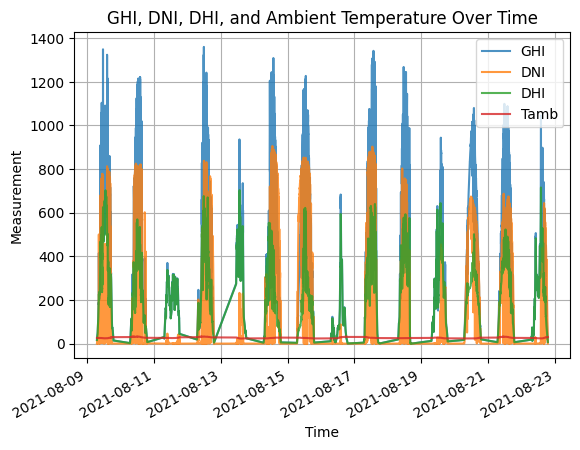

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(alpha=0.8)
plt.title('GHI, DNI, DHI, and Ambient Temperature Over Time')
plt.ylabel('Measurement')
plt.xlabel('Time')
plt.grid(True)
plt.show()

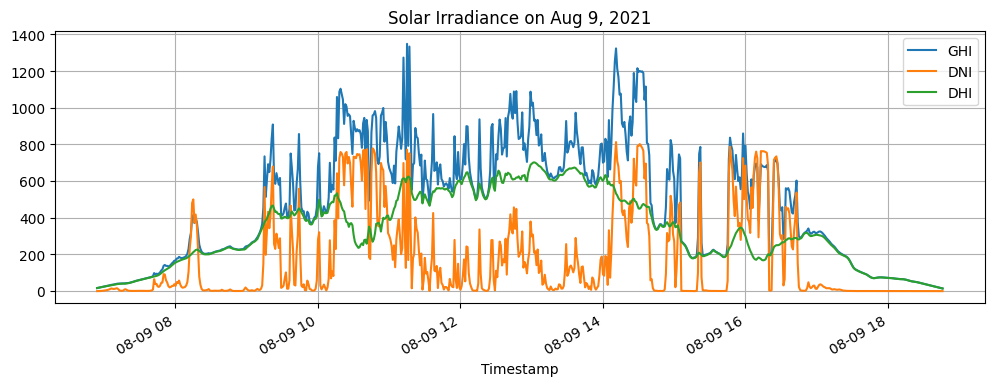

In [28]:
# Filter by a single day (example: August 9, 2021)
df_day = df[df.index.date == pd.to_datetime('2021-08-09').date()]

# Plot for that day
df_day[['GHI', 'DNI', 'DHI']].plot(figsize=(12, 4), title='Solar Irradiance on Aug 9, 2021')
plt.grid(True)
plt.show()

In [29]:
# Group by Cleaning flag and calculate the mean for ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact

,ModA,ModB
Cleaning,,
0,157.373459,157.542076
1,281.910000,284.590000


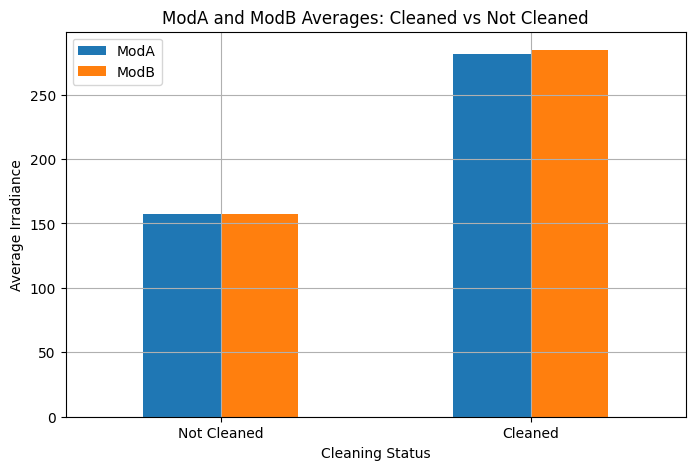

In [30]:
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('ModA and ModB Averages: Cleaned vs Not Cleaned')
plt.ylabel('Average Irradiance')
plt.xlabel('Cleaning Status')
plt.xticks(ticks=[0, 1], labels=['Not Cleaned', 'Cleaned'], rotation=0)
plt.grid(True)
plt.show()

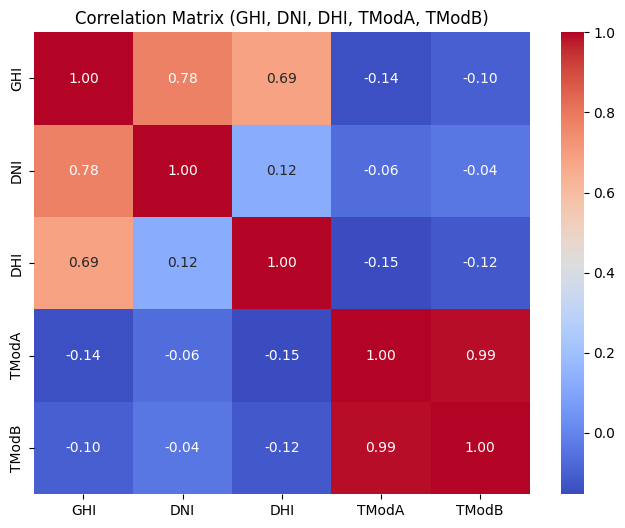

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (GHI, DNI, DHI, TModA, TModB)")
plt.show()

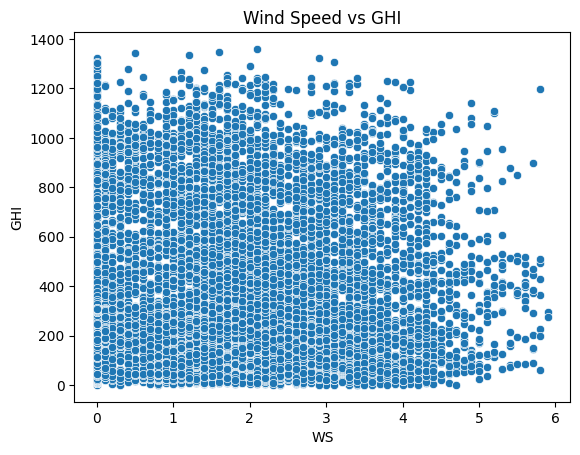

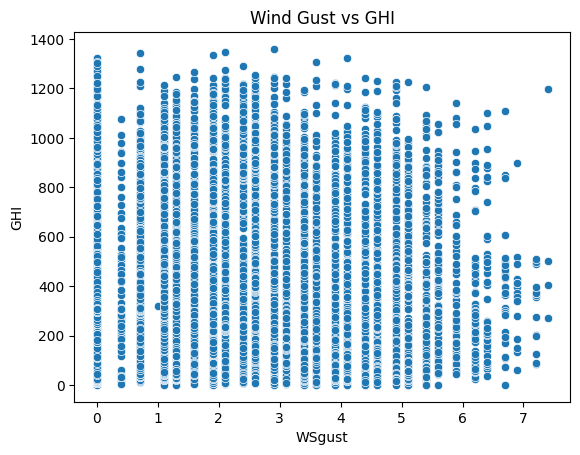

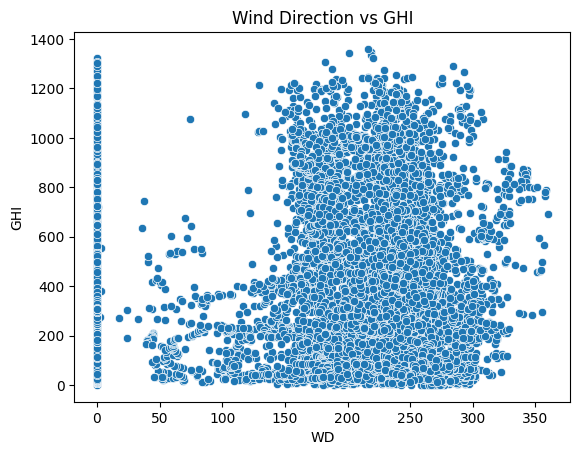

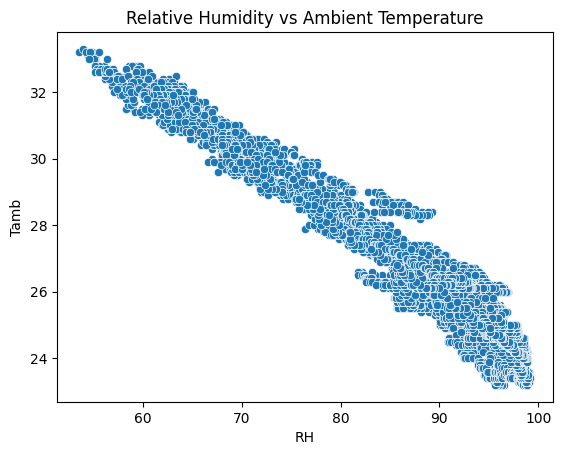

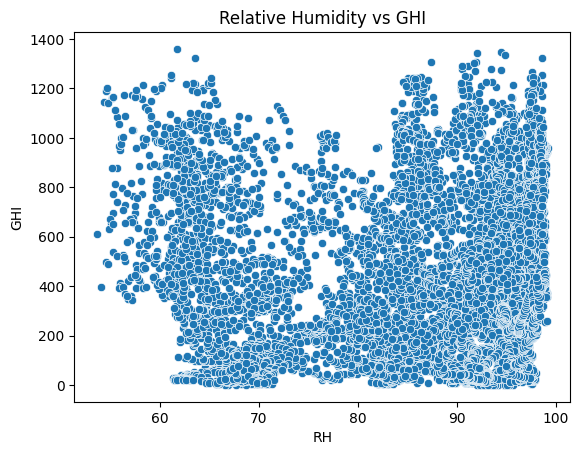

In [32]:
# Wind speed vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title("Wind Speed vs GHI")
plt.show()

# Wind gust vs GHI
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title("Wind Gust vs GHI")
plt.show()

# Wind direction vs GHI
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title("Wind Direction vs GHI")
plt.show()

# RH vs Tamb
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title("Relative Humidity vs Ambient Temperature")
plt.show()

# RH vs GHI
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title("Relative Humidity vs GHI")
plt.show()

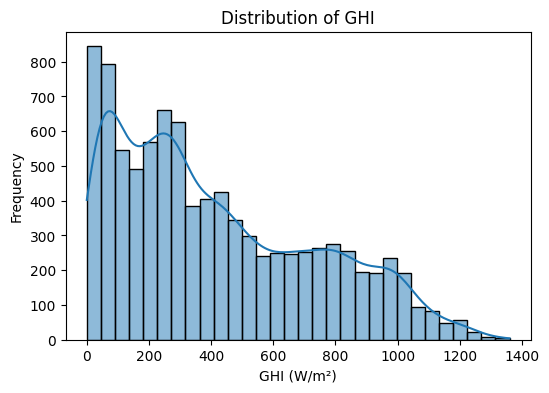

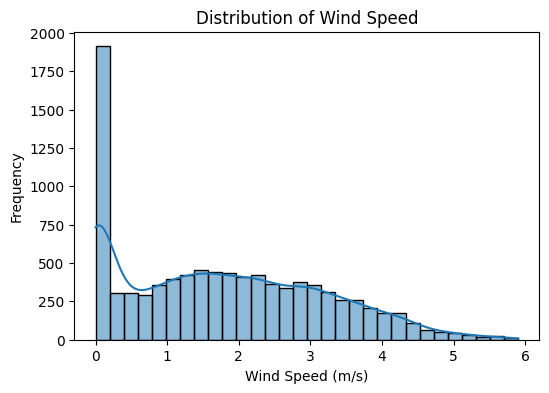

In [33]:
# Histogram for GHI
plt.figure(figsize=(6, 4))
sns.histplot(df['GHI'], bins=30, kde=True)
plt.title("Distribution of GHI")
plt.xlabel("GHI (W/m²)")
plt.ylabel("Frequency")
plt.show()

# Histogram for Wind Speed (WS)
plt.figure(figsize=(6, 4))
sns.histplot(df['WS'], bins=30, kde=True)
plt.title("Distribution of Wind Speed")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

In [36]:
pip install windrose


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


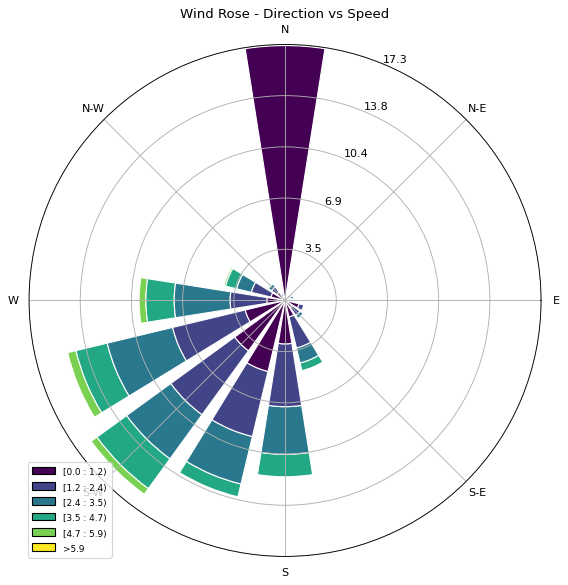

In [37]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose - Direction vs Speed")
plt.show()

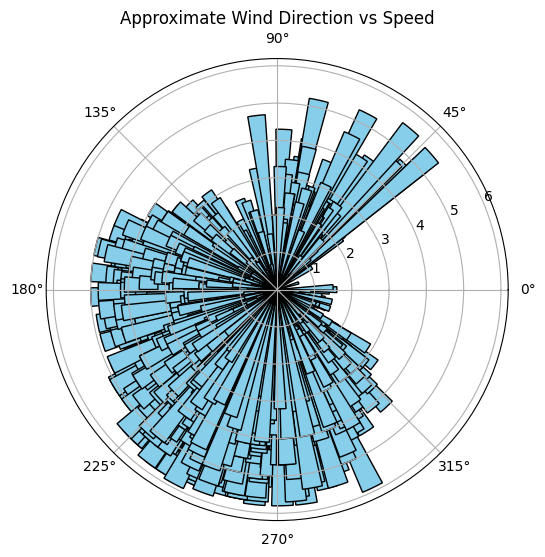

In [38]:
# Simple polar plot alternative (approximate windrose)
import numpy as np

angles = np.deg2rad(df['WD'])
radii = df['WS']

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
bars = ax.bar(angles, radii, width=0.1, color='skyblue', edgecolor='black')
ax.set_title("Approximate Wind Direction vs Speed")
plt.show()

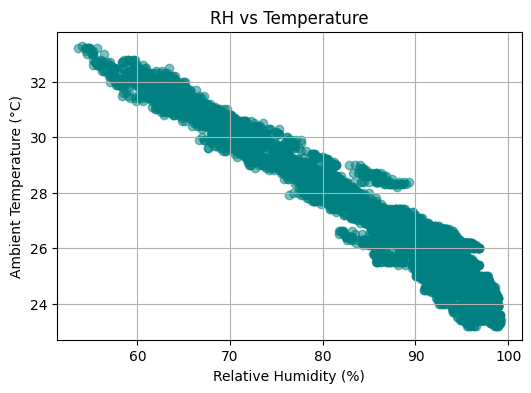

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5, color='teal')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('RH vs Temperature')
plt.grid(True)
plt.show()

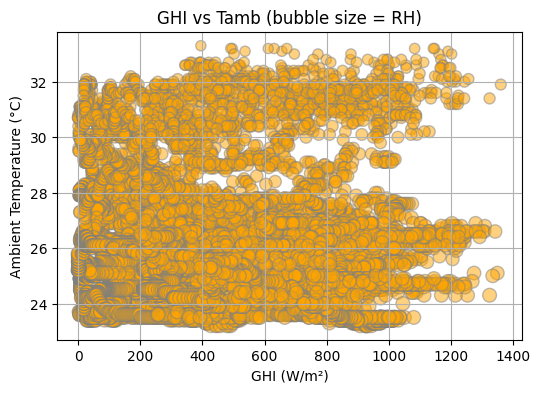

In [40]:
plt.figure(figsize=(6, 4))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='orange', edgecolors='grey')
plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.grid(True)
plt.show()

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

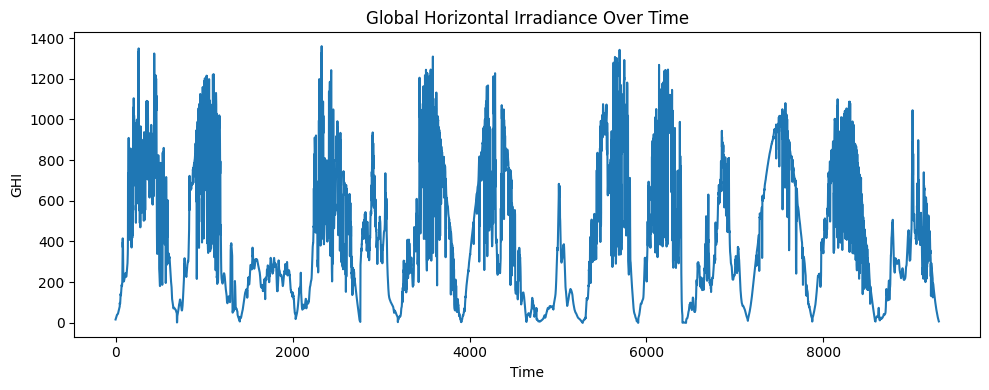

In [2]:
from eda_utils import load_data, plot_timeseries

df = load_data('data/benin_clean.csv')
plot_timeseries(df, 'GHI', 'Global Horizontal Irradiance Over Time')

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

In [2]:
from eda_utils import load_data, plot_timeseries


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filepath):
    """
    Load a CSV file into a pandas DataFrame.
    
    Args:
        filepath (str): Relative path to the CSV file
    
    Returns:
        pd.DataFrame: Loaded data
    """
    return pd.read_csv(filepath)

def plot_timeseries(df, column, title):
    """
    Plot a timeseries graph from a dataframe.
    
    Args:
        df (pd.DataFrame): The data
        column (str): Column name to plot
        title (str): Plot title
    """
    df[column].plot()
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join("..", "src")))

from eda_utils import SolarDataAnalyzer

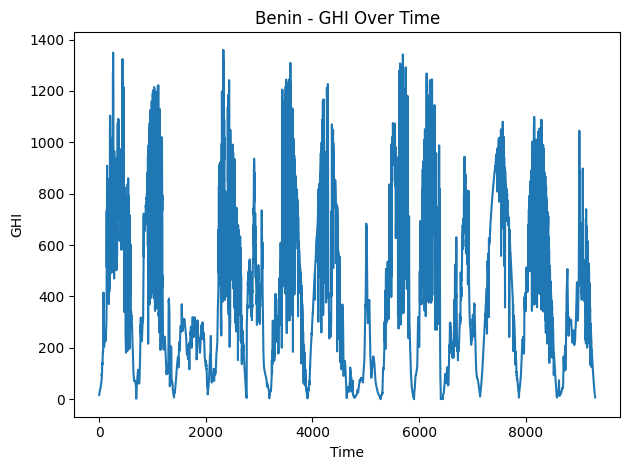

In [2]:
analyzer = SolarDataAnalyzer('data/benin_clean.csv')
analyzer.plot_column('GHI', 'Benin - GHI Over Time')

In [3]:
analyzer.summary_stats()


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000,9305.000000
mean,415.388275,210.026405,251.041698,157.507297,157.678614,26.902192,85.879162,1.755605,2.417431,0.453197,181.459656,7.153208,995.986459,0.001075,0.004267,33.291531,31.550435
std,317.783717,278.550964,161.469761,242.234335,242.429987,2.530943,11.686570,1.401198,1.717492,0.260994,93.492750,5.346021,1.537728,0.032767,0.061229,11.028999,9.073037
min,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,53.600000,0.000000,0.000000,0.000000,0.000000,0.000000,992.000000,0.000000,0.000000,22.900000,22.400000
25%,149.700000,0.700000,110.200000,0.000000,0.000000,24.900000,79.900000,0.400000,1.100000,0.400000,163.600000,2.300000,995.000000,0.000000,0.000000,25.400000,24.900000
50%,329.400000,23.600000,237.600000,6.100000,6.100000,26.300000,90.300000,1.600000,2.400000,0.500000,210.400000,7.400000,996.000000,0.000000,0.000000,27.600000,27.000000
75%,656.500000,419.800000,369.000000,246.400000,246.000000,28.400000,95.400000,2.800000,3.600000,0.600000,244.000000,10.800000,997.000000,0.000000,0.000000,38.900000,35.700000
max,1360.000000,904.000000,715.700000,975.000000,977.000000,33.300000,99.200000,5.900000,7.400000,1.600000,359.900000,43.500000,999.000000,1.000000,1.800000,70.800000,60.000000
